In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits import mplot3d

In [2]:
img_h,img_w = 128,128

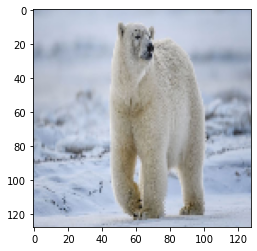

In [3]:
img = cv2.cvtColor(cv2.imread('bear.jpeg'),cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(img_h,img_w))
plt.imshow(img)
plt.show()

In [4]:
#set the pixel values
pixel_val = np.reshape(img, (-1,3))
pixel_val[:4][0]

array([149, 164, 187], dtype=uint8)

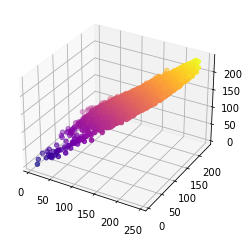

In [5]:
#plot the scatter diagram
fig = plt.figure() #Create figure object
ax = plt.axes(projection = "3d")  #add axes to the current graph
x_points = pixel_val[:,2]
y_points = pixel_val[:,0]
z_points = pixel_val[:,1]
ax.scatter3D(x_points, y_points, z_points, c = z_points, cmap = 'plasma')
plt.show()

In [6]:
#make a new class for K Means
class K_Means:
    #Step 1: initialize k(number of centroids) and datas
    def __init__(self, k, data_points):
        
        '''Initialize parameters and centroids'''
        self.k = k
        self.data_points = data_points
        self.rows = data_points.shape[0]
        
        self.centroids = []
        for i in range(self.k):
            self.centroids.append(self.data_points[i, :]) 
            #the centroids is chosen from the first centroid datapoint
       
        self.last_centroids = None
        # Return a new array of given shape and type, without initializing entries
        self.distance = np.empty((self.rows, self.k))
        # Convert the input to an array.
        self.centroids = np.asarray(self.centroids, dtype = np.float32)
        
        
    def cal_dis(self, x, C):
        #Step 2: Calculate the euclidean distance between every points to every centroids
        return np.linalg.norm(x-C, axis = 1)
    
    
    
    def __call__(self):
        
        while True:
            # Step 3 :Loop through every datas and calculate their distance between each centroid with each data points
            # Centroids is a list containing k number of points
            for row in range(self.rows):
                self.distance[row]  = self.cal_dis(self.data_points[row],self.centroids)
                #print(self.distance)
                #print(self.distance.shape[0])
                
            #Step 4 :nearest centroids accept the minimum value inside centroid list
            self.nearest_centroids = np.argmin(self.distance, axis = 1)
            #print(self.nearest_centroids)
            #print(self.nearest_centroids.shape[0])
            
            #stopping criteria 
            #break if same centroids is chosen
            if (self.last_centroids ==  self.nearest_centroids).all():
                break
            
            # Calculate the mean of each data points which contains the min distance
            for cluster in range(self.k):
                mean = np.mean(self.data_points[self.nearest_centroids == cluster], axis = 0)
                self.centroids[cluster] = mean
                
            #Step 5 :keep track of the centroids
            self.last_centroids = self.nearest_centroids
            
        return(self.nearest_centroids, self.centroids)
            

In [7]:
k_means = K_Means(k = 8, data_points=pixel_val)
centroid_index, centroid = k_means()

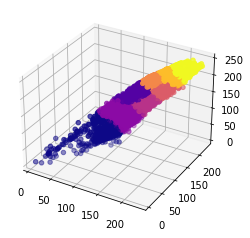

In [8]:
#show the different clusters 
fig = plt.figure() #Create figure object
ax = plt.axes(projection = "3d")  #add axes to the current graph
x_points = pixel_val[:,0]
y_points = pixel_val[:,1]
z_points = pixel_val[:,2]
ax.scatter3D(x_points, y_points, z_points, c = centroid_index, cmap = 'plasma')
plt.show()

In [9]:
new_pixels = np.zeros((img_h*img_w, 3))
#loop until number of k only
for k in range(centroid.shape[0]):
    new_pixels[centroid_index == k] = centroid[k]

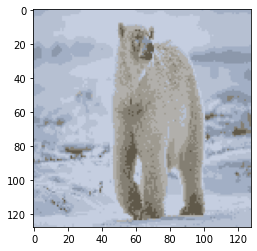

In [10]:
segmented_image = np.reshape(new_pixels,(img_h,img_w, 3))
plt.imshow(segmented_image.astype(np.uint8))
plt.show()